# Cross-Comparison between Unified Model and Alternatives

James Yu, 26 July 2022 edited 27 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We look at two different classes of networks:

In [2]:
A_1 = np.array([
    [0.9, 0.07, 0.03],
    [0.07, 0.58, 0.35],
    [0.03, 0.35, 0.62]
])

A_2 = np.array([
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

In [3]:
eigvals_1, U_1 = np.linalg.eig(A_1)
eigvals_1

array([1.        , 0.85199338, 0.24800662])

The second-largest eigenvalue is 0.852.

In [4]:
eigvals_2, U_2 = np.linalg.eig(A_2)
eigvals_2

array([1.        , 0.19416995, 0.40583005])

The second-largest eigenvalue is 0.406.

In [5]:
delta = 0.9
c = 1.0
T = 60
x_0 = np.array([[10.0, -5.0, 5.0]], ndmin = 2).T
x_0

array([[10.],
       [-5.],
       [ 5.]])

# Convergence and Payoffs

In [6]:
def finite_solution(A, delta, c, T, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    for i in range(T): # generate solution matrices
        K_t = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t)

    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [x_0]
    print("L_0:")
    print(-delta * (np.linalg.inv((delta * K_sequence[1]) + (c * I)) @ K_sequence[1] @ D))
    for i, K in enumerate(K_sequence[1:]): # L_0(K_1), L_1(K_2), etc
        L_t = -delta * (np.linalg.inv((delta * K) + (c * I)) @ K @ D)
        tilde_r_t = L_t @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = U @ tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts

In [7]:
def payoffs(xs, rs, delta, c, T, finite = True):
    stage_payoffs = []
    discounted_stage_payoffs = []
    cumulative_payoffs = []
    payoff = 0.0
    for i in range(T):
        stage_payoff = (xs[i].T @ xs[i]).item() + (c * (rs[i].T @ rs[i])).item()
        payoff += -delta**i * stage_payoff
        stage_payoffs.append(-stage_payoff)
        discounted_stage_payoffs.append(-delta**i * stage_payoff)
        cumulative_payoffs.append(payoff)

    if finite:
        stage_payoff_T = (xs[-1].T @ xs[-1]).item()
        payoff += -delta**T * stage_payoff_T
        stage_payoffs.append(-stage_payoff_T)
        discounted_stage_payoffs.append(-delta**i * stage_payoff_T)
        cumulative_payoffs.append(payoff)
        
    return payoff, stage_payoffs, discounted_stage_payoffs, cumulative_payoffs

In [8]:
x_sequence_1, r_sequence_1 = finite_solution(A_1, delta, c, T, x_0)

L_0:
[[-0.58840335 -0.         -0.        ]
 [-0.         -0.47581248 -0.        ]
 [-0.         -0.         -0.11928062]]


In [9]:
x_sequence_2, r_sequence_2 = finite_solution(A_2, delta, c, T, x_0)

L_0:
[[-0.58840335 -0.         -0.        ]
 [-0.         -0.09284049 -0.        ]
 [-0.         -0.         -0.20014901]]


In [10]:
payoff_1, stage_payoffs_1, discounted_stage_payoffs_1, cumulative_payoffs_1 = payoffs(x_sequence_1, r_sequence_1, delta, c, T)
payoff_2, stage_payoffs_2, discounted_stage_payoffs_2, cumulative_payoffs_2 = payoffs(x_sequence_2, r_sequence_2, delta, c, T)

## Finite-horizon:

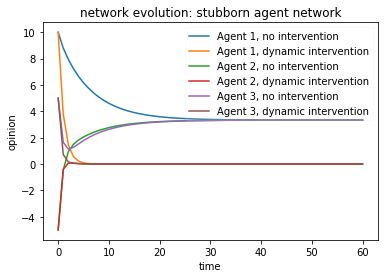

In [11]:
xs_1 = [np.linalg.matrix_power(A_1, t) @ x_0 for t in range(T+1)]
for i in range(3):
    plt.plot(range(T+1), [xs_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

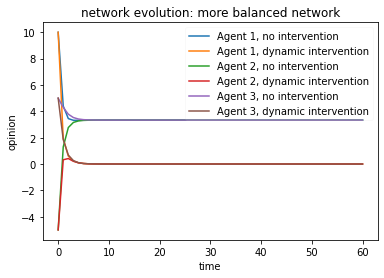

In [12]:
xs_2 = [np.linalg.matrix_power(A_2, t) @ x_0 for t in range(T+1)]
for i in range(3):
    plt.plot(range(T+1), [xs_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(T+1), [x_sequence_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

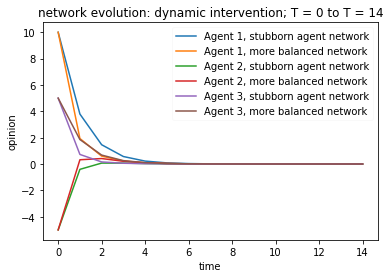

In [13]:
for i in range(3):
    plt.plot(range(15), [x_sequence_1[j][i].item() for j in range(15)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(15), [x_sequence_2[j][i].item() for j in range(15)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: dynamic intervention; T = 0 to T = 14")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

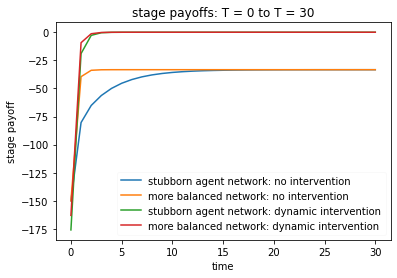

In [14]:
TRUNCATE_TO = 31
plt.plot(range(TRUNCATE_TO), [-(xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-(xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("stage payoff")
plt.title(f"stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

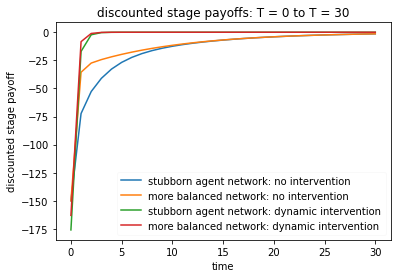

In [15]:
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("discounted stage payoff")
plt.title(f"discounted stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

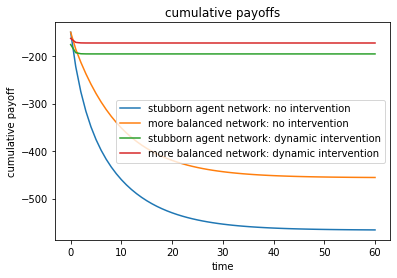

In [16]:
cumulative_payoff_1 = 0.0
cumulative_payoff_2 = 0.0
p_1 = []
p_2 = []
for i in range(T+1):
    cumulative_payoff_1 += -(delta**i) * (xs_1[i].T @ xs_1[i]).item()
    cumulative_payoff_2 += -(delta**i) * (xs_2[i].T @ xs_2[i]).item()
    p_1.append(cumulative_payoff_1)
    p_2.append(cumulative_payoff_2)
    
plt.plot(range(T+1), p_1, label = "stubborn agent network: no intervention")
plt.plot(range(T+1), p_2, label = "more balanced network: no intervention")
plt.plot(range(T+1), cumulative_payoffs_1, label = "stubborn agent network: dynamic intervention")
plt.plot(range(T+1), cumulative_payoffs_2, label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("cumulative payoff")
plt.title("cumulative payoffs")
plt.legend()
plt.show()

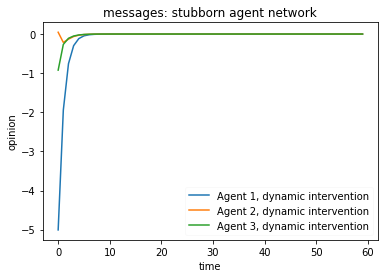

In [17]:
for i in range(3):
    plt.plot(range(T), [r_sequence_1[j][i].item() for j in range(T)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network")
plt.legend(framealpha = 0.1)
plt.show()

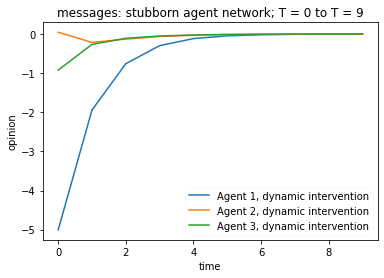

In [18]:
for i in range(3):
    plt.plot(range(10), [r_sequence_1[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

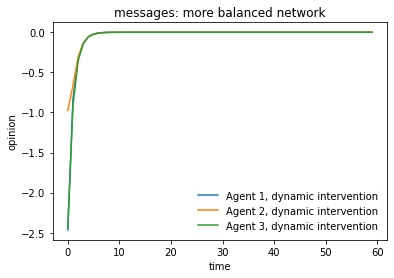

In [19]:
for i in range(3):
    plt.plot(range(T), [r_sequence_2[j][i].item() for j in range(T)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network")
plt.legend(framealpha = 0.1)
plt.show()

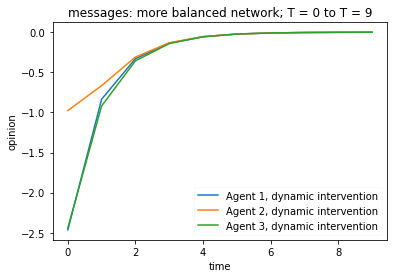

In [20]:
for i in range(3):
    plt.plot(range(10), [r_sequence_2[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

## Infinite-horizon

Comparisons are made to the same no-intervention data as in the finite-horizon case

In [21]:
def infinite_solution(A, delta, c, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    while True: # generate solution matrices
        K_t_new = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, 
                       rtol = np.finfo(K_t.dtype).eps, 
                       atol = np.finfo(K_t.dtype).eps):
            break
        K_t = K_t_new
        
    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [x_0]
    K_ss = K_sequence[0]
    while True:
        L_ss = -delta * (np.linalg.inv((delta * K_ss) + (c * I)) @ K_ss @ D)
        tilde_r_t = L_ss @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = U @ tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        if np.allclose(tilde_x_t, tilde_x_t_new, 
                       rtol = np.finfo(tilde_x_t.dtype).eps, 
                       atol = np.finfo(tilde_x_t.dtype).eps):
            break
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts, K_ss

In [22]:
x_sequence_1i, r_sequence_1i, K_ss_1 = infinite_solution(A_1, delta, c, x_0)
x_sequence_2i, r_sequence_2i, K_ss_2 = infinite_solution(A_2, delta, c, x_0)
payoff_1i, stage_payoffs_1i, discounted_stage_payoffs_1i, cumulative_payoffs_1i = payoffs(x_sequence_1i, 
                                                                                      r_sequence_1i, 
                                                                                      delta, 
                                                                                      c, 
                                                                                      len(r_sequence_1i), 
                                                                                      finite = False)
payoff_2i, stage_payoffs_2i, discounted_stage_payoffs_2i, cumulative_payoffs_2i = payoffs(x_sequence_2i, 
                                                                                      r_sequence_2i, 
                                                                                      delta, 
                                                                                      c, 
                                                                                      len(r_sequence_2i), 
                                                                                      finite = False)

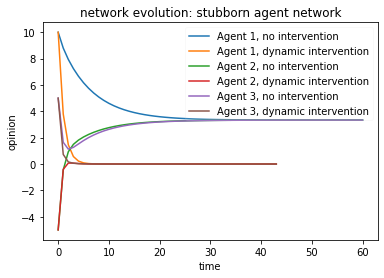

In [23]:
for i in range(3):
    plt.plot(range(T+1), [xs_1[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(len(x_sequence_1i)), [x_sequence_1i[j][i].item() for j in range(len(x_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

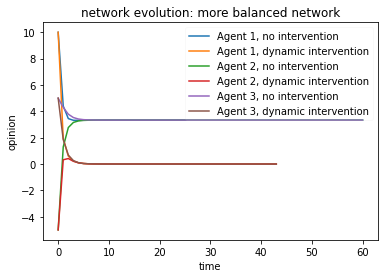

In [24]:
for i in range(3):
    plt.plot(range(T+1), [xs_2[j][i].item() for j in range(T+1)], label = f"Agent {i+1}, no intervention")
    plt.plot(range(len(x_sequence_2i)), [x_sequence_2i[j][i].item() for j in range(len(x_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

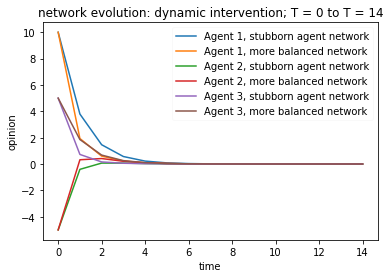

In [25]:
for i in range(3):
    plt.plot(range(15), [x_sequence_1i[j][i].item() for j in range(15)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(15), [x_sequence_2i[j][i].item() for j in range(15)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: dynamic intervention; T = 0 to T = 14")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

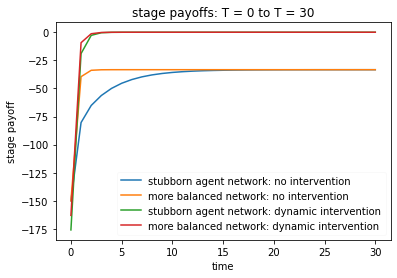

In [26]:
TRUNCATE_TO = 31
plt.plot(range(TRUNCATE_TO), [-(xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-(xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("stage payoff")
plt.title(f"stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

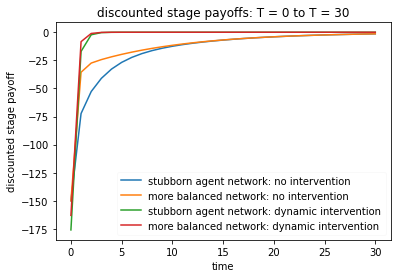

In [27]:
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_1[i].T @ xs_1[i]).item() for i in range(TRUNCATE_TO)], label = "stubborn agent network: no intervention")
plt.plot(range(TRUNCATE_TO), [-delta**i * (xs_2[i].T @ xs_2[i]).item() for i in range(TRUNCATE_TO)], label = "more balanced network: no intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("discounted stage payoff")
plt.title(f"discounted stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

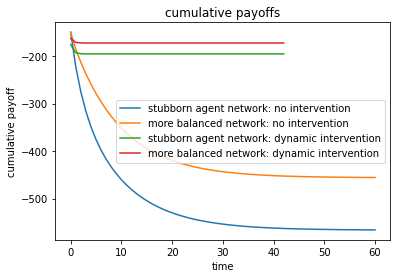

In [28]:
plt.plot(range(T+1), p_1, label = "stubborn agent network: no intervention")
plt.plot(range(T+1), p_2, label = "more balanced network: no intervention")
plt.plot(range(len(cumulative_payoffs_1i)), cumulative_payoffs_1i, label = "stubborn agent network: dynamic intervention")
plt.plot(range(len(cumulative_payoffs_2i)), cumulative_payoffs_2i, label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("cumulative payoff")
plt.title("cumulative payoffs")
plt.legend()
plt.show()

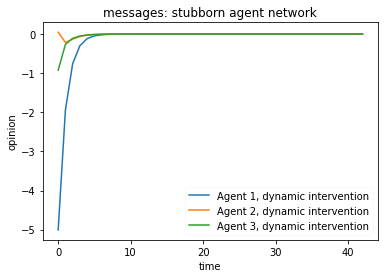

In [29]:
for i in range(3):
    plt.plot(range(len(r_sequence_1i)), [r_sequence_1i[j][i].item() for j in range(len(r_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network")
plt.legend(framealpha = 0.1)
plt.show()

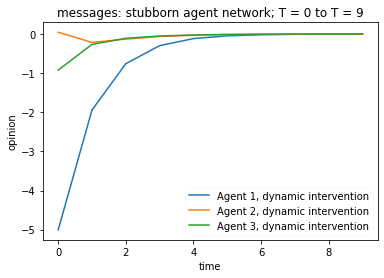

In [30]:
for i in range(3):
    plt.plot(range(10), [r_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: stubborn agent network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

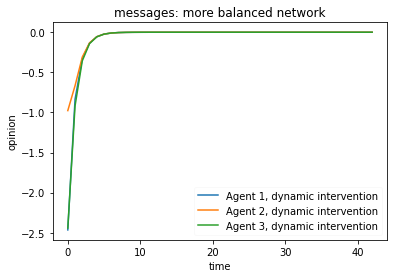

In [31]:
for i in range(3):
    plt.plot(range(len(r_sequence_2i)), [r_sequence_2i[j][i].item() for j in range(len(r_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network")
plt.legend(framealpha = 0.1)
plt.show()

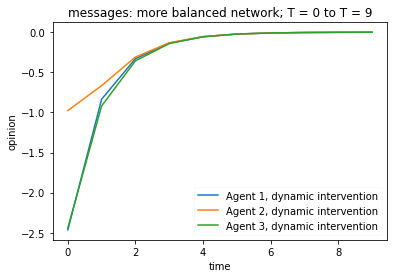

In [32]:
for i in range(3):
    plt.plot(range(10), [r_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("messages: more balanced network; T = 0 to T = 9")
plt.legend(framealpha = 0.1)
plt.show()

## Correctness-check of $K_{ss}$:

In [33]:
K_ss_1

array([[1.58840335, 0.        , 0.        ],
       [0.        , 1.40538908, 0.        ],
       [0.        , 0.        , 1.02958238]])

In [34]:
K_ss_2

array([[1.58840335, 0.        , 0.        ],
       [0.        , 1.01802683, 0.        ],
       [0.        , 0.        , 1.08122648]])

In [35]:
def K_j_star(c, delta, lambda_j):
    return ((delta + delta*c*lambda_j**2 - c + np.sqrt((c - delta - delta*c*lambda_j**2)**2 + 4 * delta * c))) / (2 * delta)

In [36]:
np.diag([K_j_star(c, delta, lambda_j) for lambda_j in eigvals_1])

array([[1.58840335, 0.        , 0.        ],
       [0.        , 1.40538908, 0.        ],
       [0.        , 0.        , 1.02958238]])

In [37]:
np.diag([K_j_star(c, delta, lambda_j) for lambda_j in eigvals_2])

array([[1.58840335, 0.        , 0.        ],
       [0.        , 1.01802683, 0.        ],
       [0.        , 0.        , 1.08122648]])

The analytical result is the same as the numerical result.

In [38]:
-x_0.T @ K_ss_1 @ x_0

array([[-219.71462147]])

In [39]:
-x_0.T @ K_ss_2 @ x_0

array([[-211.32166783]])

## Correctness-check of $L_{ss}$:

In [40]:
L_ss_1 = -delta * (np.linalg.inv((delta * K_ss_1) + (c * np.identity(3))) @ K_ss_1 @ np.diag(eigvals_1))
L_ss_2 = -delta * (np.linalg.inv((delta * K_ss_2) + (c * np.identity(3))) @ K_ss_2 @ np.diag(eigvals_2))

In [41]:
L_ss_1

array([[-0.58840335, -0.        , -0.        ],
       [-0.        , -0.47581248, -0.        ],
       [-0.        , -0.        , -0.11928062]])

In [42]:
L_ss_2

array([[-0.58840335, -0.        , -0.        ],
       [-0.        , -0.09284049, -0.        ],
       [-0.        , -0.        , -0.20014901]])

In [43]:
def L_ss_j(c, delta, lambda_j):
    return -(delta * K_j_star(c, delta, lambda_j) * lambda_j) / (delta * K_j_star(c, delta, lambda_j) + c)

In [44]:
np.diag([L_ss_j(c, delta, lambda_j) for lambda_j in eigvals_1])

array([[-0.58840335,  0.        ,  0.        ],
       [ 0.        , -0.47581248,  0.        ],
       [ 0.        ,  0.        , -0.11928062]])

In [45]:
np.diag([L_ss_j(c, delta, lambda_j) for lambda_j in eigvals_2])

array([[-0.58840335,  0.        ,  0.        ],
       [ 0.        , -0.09284049,  0.        ],
       [ 0.        ,  0.        , -0.20014901]])

Again, the analytical result is the same as the numerical result.

# Comparison between infinite-horizon dynamic targeting and one-shot targeting

In [46]:
# finite/infinite horizon behaves the same in intermediate periods,
#   so pinning T to that of the infinite horizon model
def one_shot(A, delta, c, T, x_0):
    xs = [x_0]
    I = np.identity(len(x_0))
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    tilde_x_0 = U.T @ x_0
    print("L_0:")
    print(-delta * np.linalg.inv((c * I) + (delta * np.linalg.inv(I - (delta * (D @ D))))) @ np.linalg.inv(I - (delta * (D @ D))) @ D)
    tilde_r_0 = -delta * np.linalg.inv((c * I) + (delta * np.linalg.inv(I - (delta * (D @ D))))) @ np.linalg.inv(I - (delta * (D @ D))) @ D @ tilde_x_0
    tilde_x_t = D @ tilde_x_0 + tilde_r_0
    xs.append(U @ tilde_x_t)
    r_0 = U @ tilde_r_0
    print("r_0 =", r_0.T)
    for i in range(T-1):
        tilde_x_t = D @ tilde_x_t
        xs.append(U @ tilde_x_t)
       
    payoff = 0.0
    stage_payoffs = []
    discounted_stage_payoffs = []
    cumulative_payoffs = []
    
    payoff += -(x_0.T @ x_0).item() - (c * (r_0.T @ r_0).item())
    stage_payoffs.append(payoff)
    discounted_stage_payoffs.append(payoff)
    cumulative_payoffs.append(payoff)
    for i in range(1, T+1):
        stage_payoff = (xs[i].T @ xs[i]).item()
        stage_payoffs.append(-stage_payoff)
        discounted_stage_payoffs.append(-delta**i * stage_payoff)
        payoff += -delta**i * stage_payoff
        cumulative_payoffs.append(payoff)
    return xs, payoff, stage_payoffs, discounted_stage_payoffs, cumulative_payoffs

In [47]:
one_xs_1, one_payoff_1, one_stage_payoffs_1, one_discounted_stage_payoffs_1, one_cumulative_payoffs_1 = one_shot(A_1, delta, c, len(x_sequence_1i) - 1, x_0)

L_0:
[[-0.9         0.          0.        ]
 [ 0.         -0.61506069  0.        ]
 [ 0.          0.         -0.12100222]]
r_0 = [[-6.92593498 -0.58746762 -1.4865974 ]]


In [48]:
one_xs_2, one_payoff_2, one_stage_payoffs_2, one_discounted_stage_payoffs_2, one_cumulative_payoffs_2 = one_shot(A_2, delta, c, len(x_sequence_2i) - 1, x_0)

L_0:
[[-0.9         0.          0.        ]
 [ 0.         -0.09364768  0.        ]
 [ 0.          0.         -0.2085015 ]]
r_0 = [[-3.50070616 -1.99427397 -3.50501987]]


Compare this to the first messages in the dynamic model:

In [49]:
r_sequence_1i[:3]

[array([[-5.00752361],
        [ 0.0459721 ],
        [-0.92248198]]),
 array([[-1.94277388],
        [-0.21425004],
        [-0.26482456]]),
 array([[-0.7580832 ],
        [-0.13005139],
        [-0.10869014]])]

In [50]:
r_sequence_2i[:3]

[array([[-2.46479009],
        [-0.97714794],
        [-2.44209546]]),
 array([[-0.83581823],
        [-0.66657929],
        [-0.91945096]]),
 array([[-0.33054299],
        [-0.30958962],
        [-0.35669211]])]

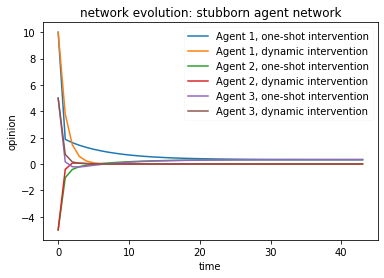

In [51]:
for i in range(3):
    plt.plot(range(len(one_xs_1)), [one_xs_1[j][i].item() for j in range(len(one_xs_1))], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(len(x_sequence_1i)), [x_sequence_1i[j][i].item() for j in range(len(x_sequence_1i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

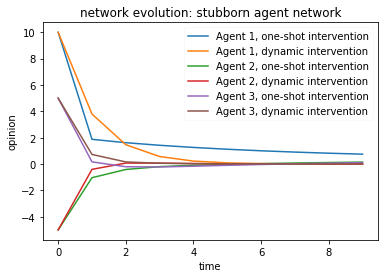

In [52]:
for i in range(3):
    plt.plot(range(10), [one_xs_1[j][i].item() for j in range(10)], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: stubborn agent network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

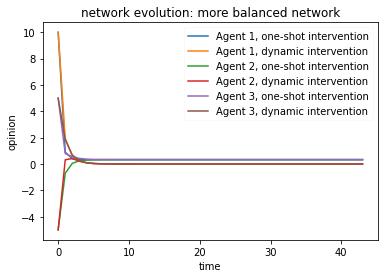

In [53]:
for i in range(3):
    plt.plot(range(len(one_xs_2)), [one_xs_2[j][i].item() for j in range(len(one_xs_2))], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(len(x_sequence_2i)), [x_sequence_2i[j][i].item() for j in range(len(x_sequence_2i))], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

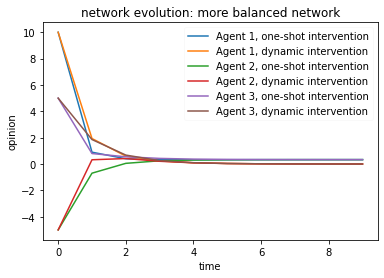

In [54]:
for i in range(3):
    plt.plot(range(10), [one_xs_2[j][i].item() for j in range(10)], label = f"Agent {i+1}, one-shot intervention")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, dynamic intervention")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.title("network evolution: more balanced network")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.show()

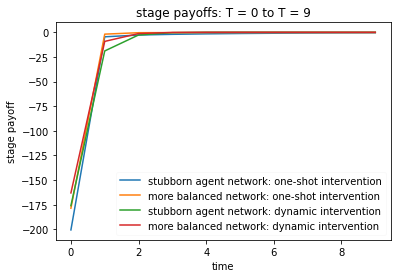

In [55]:
TRUNCATE_TO = 10
plt.plot(range(TRUNCATE_TO), one_stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), one_stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("stage payoff")
plt.title(f"stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

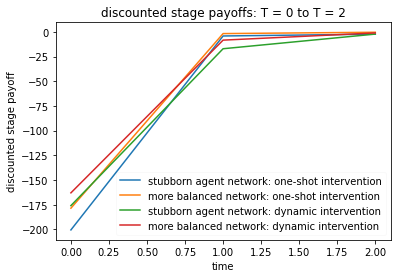

In [56]:
TRUNCATE_TO = 3
plt.plot(range(TRUNCATE_TO), one_discounted_stage_payoffs_1[:TRUNCATE_TO], label = "stubborn agent network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), one_discounted_stage_payoffs_2[:TRUNCATE_TO], label = "more balanced network: one-shot intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_1i[:TRUNCATE_TO], label = "stubborn agent network: dynamic intervention")
plt.plot(range(TRUNCATE_TO), discounted_stage_payoffs_2i[:TRUNCATE_TO], label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("discounted stage payoff")
plt.title(f"discounted stage payoffs: T = 0 to T = {TRUNCATE_TO - 1}")
plt.legend(framealpha = 0.1)
plt.show()

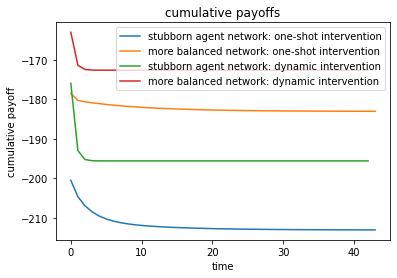

In [57]:
plt.plot(range(len(one_cumulative_payoffs_1)), one_cumulative_payoffs_1, label = "stubborn agent network: one-shot intervention")
plt.plot(range(len(one_cumulative_payoffs_2)), one_cumulative_payoffs_2, label = "more balanced network: one-shot intervention")
plt.plot(range(len(cumulative_payoffs_1i)), cumulative_payoffs_1i, label = "stubborn agent network: dynamic intervention")
plt.plot(range(len(cumulative_payoffs_2i)), cumulative_payoffs_2i, label = "more balanced network: dynamic intervention")
plt.xlabel("time")
plt.ylabel("cumulative payoff")
plt.title("cumulative payoffs")
plt.legend()
plt.show()

# Conclusions

- payoff-wise and convergence-wise, the dynamic model outperforms the no intervention model
- payoff-wise, the dynamic model also outperforms the one-shot intervention model; convergence speed is a bit more ambiguous but accuracy to target agenda is better in the dynamic model given that there are agents converging to not-zero in the one-shot model
- payoff and convergence speed from the more balanced model (which has a smaller second eigenvalue) outperform the model with a more stubborn agent (which has a larger second eigenvalue)